data           Soil  Temperature   Humidity        ph    Rainfall       Crops  \
0     Alluvial    20.879744  82.002744  6.502985  202.935536        rice   
1     Alluvial    21.770462  80.319644  7.038096  226.655537        rice   
2     Alluvial    23.004459  82.320763  7.840207  263.964248        rice   
3     Alluvial    26.491096  80.158363  6.980401  242.864034        rice   
4     Alluvial    20.130175  81.604873  7.628473  262.717340        rice   
...        ...          ...        ...       ...         ...         ...   
3095     Black    25.287846  89.636679  6.765095   58.286977  watermelon   
3096     Black    26.638386  84.695469  6.189214   48.324286  watermelon   
3097     Black    25.331045  84.305338  6.904242   41.532187  watermelon   
3098     Black    26.897502  83.892415  6.463271   43.971937  watermelon   
3099     Black    26.986037  89.413849  6.260839   58.548767  watermelon   

          Ca      Mg       K    S       N  Lime     C    P  Moisture  \
0      9.6

<ipython-input-14-a661b2f6c96e>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Type_new = pd.Series([])


[10.1  25.4   9.9  18.1  17.25 13.05 23.   17.45 23.    4.5   9.   15.4
  6.   14.    8.6  14.   25.3  27.95 11.   26.5   2.7  10.2   7.9  21.05
 23.2  14.   25.7  13.65  0.    9.7  25.15  9.75 26.1   8.   19.    2.
 15.7   6.75  7.6  18.5  18.65 23.85 23.    8.   26.85 19.35 18.8   7.4
 22.45 17.2  27.   18.6  11.    7.5  18.15  0.   18.3   6.95 10.1   3.
 13.15 18.45 18.9  22.95  8.    9.   13.1  22.9   2.9  14.1   0.   22.
  9.85  9.2  25.85  9.45 17.2   6.    6.35 18.    2.   11.2   5.8  17.2
 18.1  23.6   8.7   8.   15.65 12.   20.   28.25 23.55  9.7  20.3  25.05
 11.65 25.65  6.3  25.45  9.   12.95  5.8  25.15 10.25  2.   10.6  28.
 16.55  9.55  9.95 11.5  17.7  26.   12.65 26.4  26.7   9.5   0.   13.9
 24.   21.7  26.4  25.2  25.6  13.   26.8  15.9  14.8  20.    9.9  23.
 14.   25.35 12.25 20.4  22.4   7.7   9.05  5.35 17.05 27.7  15.8  24.
 17.65 23.55 12.    8.7  18.85 14.05 12.   14.5   6.4   4.65 23.8   7.05
 25.8  26.1   0.   16.7  14.6  18.45 25.35 13.15  0.   14.55 20.   

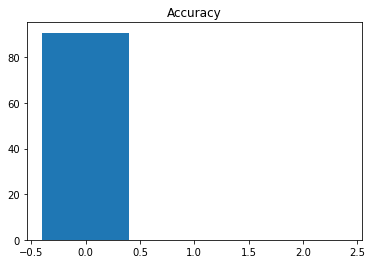

In [14]:
import pandas as pd
import numpy as np

dff = pd.read_csv("data/CropData.csv")
data = 'Mangalore'
    #input("Enter Location:")
data1 = 'Alluvial'
    #input("Enter Soil:")
data2 = 3
    #int(input("Enter Area:"))

df1 = dff[dff['Location'].str.contains(data)]
df2 = df1[df1['Soil'].str.contains(data1)]
# print("df2:",df2)

data = pd.read_csv("data/CropData.csv")
print('data',data)
Type_new = pd.Series([])

for i in range(len(data)):
    if data["Crops"][i] == "Coconut":
        Type_new[i] = "Coconut"

    elif data["Crops"][i] == "Cocoa":
        Type_new[i] = "Cocoa"

    elif data["Crops"][i] == "Coffee":
        Type_new[i] = "Coffee"

    elif data["Crops"][i] == "Cardamum":
        Type_new[i] = "Cardamum"

    elif data["Crops"][i] == "Pepper":
        Type_new[i] = "Pepper"

    elif data["Crops"][i] == "Arecanut":
        Type_new[i] = "Arecanut"

    elif data["Crops"][i] == "Ginger":
        Type_new[i] = "Ginger"

    elif data["Crops"][i] == "Tea":
        Type_new[i] = "Tea"

    else:
        Type_new[i] = data["Crops"][i]

data.insert(16, "Crop val", Type_new)
data.drop(["Location", "Soil", "Crops"], axis=1,
          inplace=True)
data.to_csv("data/train.csv", header=False, index=False)
data.head()
dataset = pd.read_csv("data/train.csv")
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, 13].values

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

from sklearn import metrics
errors=metrics.mean_absolute_error(y_test, y_pred)
print("errors",errors)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("ytest",np.mean(y_test))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.mean(y_test))# Calculate and display accuracy

print("mape",mape)
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [accuracy, 0, 0]
plt.title('Accuracy')
plt.bar(x, y)
plt.show()
